# Viterbi

### Primera palabra
$$ \nu_1 (\text{tag}) = \rho_{\text{tag}} \times P(\text{word}|\text{tag}) $$
### Enésima palabra
$$ a_1 = v_1 \times \text{transition} \times \text{emission} $$

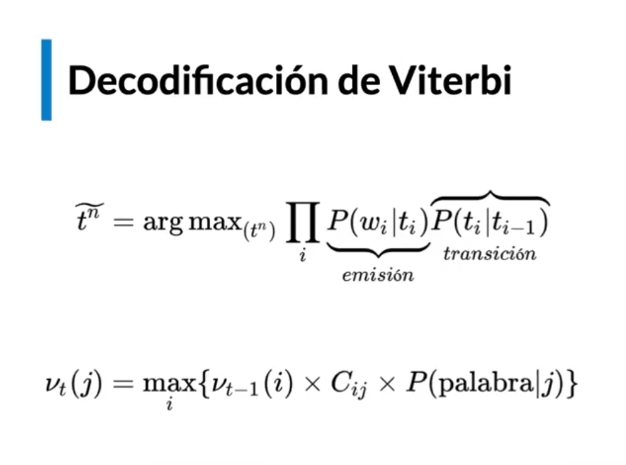

Dada una secuencia de palabras $\{p_1, p_2, \dots, p_n \}$, y un conjunto de categorias gramaticales dadas por la convención `upos`, se considera la matriz de probabilidades de Viterbi así:

$$
\begin{array}{c c}
\begin{array}{c c c c}
\text{ADJ} \\
\text{ADV}\\
\text{PRON} \\
\vdots \\
{}
\end{array} 
&
\left[
\begin{array}{c c c c}
\nu_1(\text{ADJ}) & \nu_2(\text{ADJ}) & \dots  & \nu_n(\text{ADJ})\\
\nu_1(\text{ADV}) & \nu_2(\text{ADV}) & \dots  & \nu_n(\text{ADV})\\ 
\nu_1(\text{PRON}) & \nu_2(\text{PRON}) & \dots  & \nu_n(\text{PRON})\\
\vdots & \vdots & \dots & \vdots \\ \hdashline
p_1 & p_2 & \dots & p_n 
\end{array}
\right] 
\end{array}
$$

Donde las probabilidades de la primera columna (para una categoria $i$) están dadas por: 

$$
\nu_1(i) = \underbrace{\rho_i^{(0)}}_{\text{probabilidad inicial}} \times \underbrace{P(p_1 \vert i)}_{\text{emisión}}
$$

luego, para la segunda columna (dada una categoria $j$) serán: 

$$
\nu_2(j) = \max_i \{ \nu_1(i) \times \underbrace{P(j \vert i)}_{\text{transición}} \times \underbrace{P(p_2 \vert j)}_{\text{emisión}} \}
$$

así, en general las probabilidades para la columna $t$ estarán dadas por: 

$$
\nu_{t}(j) = \max_i \{ \overbrace{\nu_{t-1}(i)}^{\text{estado anterior}} \times \underbrace{P(j \vert i)}_{\text{transición}} \times \underbrace{P(p_t \vert j)}_{\text{emisión}} \}
$$

In [171]:
import numpy as np
import pandas as pd

from pathlib import Path

In [172]:
transition = pd.read_pickle(Path.cwd().parent.parent.parent / 'data' / 'transitionHMM.npy')
emission = pd.read_pickle(Path.cwd().parent.parent.parent / 'data' / 'emissionHMM.npy')
inittag_prob = pd.read_pickle(Path.cwd().parent.parent.parent / 'data' / 'inittagprobHMM.npy') # rho

In [173]:
transition_mat = \
    transition \
    .sort_index(level=[0,1]) \
    .to_frame("p") \
    .reset_index() \
    .pivot_table(index = "tag", columns = "tag_prev") \
    .fillna(0) \
    .droplevel(level=0, axis=1)
tags_enum = transition_mat.index.tolist()
transition_mat.applymap("{:,.3f}".format)

tag_prev,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PART,PRON,PROPN,PUNCT,SCONJ,SYM,VERB,_
tag,,,,,,,,,,,,,,,,,
ADJ,0.030,0.012,0.132,0.130,0.085,0.087,0.000,0.170,0.034,0.000,0.016,0.015,0.035,0.009,0.028,0.025,0.000
ADP,0.249,0.002,0.158,0.028,0.085,0.003,0.100,0.323,0.186,0.000,0.068,0.123,0.142,0.066,0.500,0.245,0.861
ADV,0.018,0.013,0.056,0.057,0.055,0.006,0.000,0.021,0.005,0.429,0.069,0.015,0.053,0.050,0.028,0.079,0.000
AUX,0.015,0.005,0.082,0.052,0.008,0.000,0.000,0.019,0.006,0.000,0.127,0.025,0.022,0.032,0.000,0.006,0.002
CCONJ,0.067,0.000,0.015,0.002,0.000,0.000,0.000,0.050,0.029,0.000,0.006,0.060,0.060,0.002,0.056,0.009,0.000
DET,0.015,0.514,0.089,0.127,0.198,0.012,0.000,0.014,0.007,0.000,0.025,0.013,0.174,0.306,0.000,0.266,0.000
INTJ,0.000,0.000,0.000,0.000,0.001,0.000,0.000,0.000,0.000,0.000,0.001,0.000,0.001,0.000,0.000,0.000,0.000
NOUN,0.216,0.195,0.026,0.030,0.115,0.705,0.000,0.009,0.551,0.500,0.007,0.001,0.053,0.049,0.028,0.053,0.000
NUM,0.004,0.036,0.006,0.001,0.027,0.027,0.000,0.004,0.010,0.000,0.010,0.003,0.016,0.000,0.000,0.021,0.000


In [174]:
emission_mat = \
    emission \
    .sort_index(level=[0,1]) \
    .to_frame("p") \
    .reset_index() \
    .pivot_table(index = "word", columns = "tag") \
    .fillna(0) \
    .droplevel(level=0, axis=1)
emission_mat.applymap("{:,.3e}".format)

tag,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PART,PRON,PROPN,PUNCT,SCONJ,SYM,VERB,_
word,,,,,,,,,,,,,,,,,
!,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,1.111e-03,0.000e+00,0.000e+00,0.000e+00,0.000e+00
"""",0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,1.450e-01,0.000e+00,0.000e+00,0.000e+00,0.000e+00
"""tucho""",0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,2.470e-04,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00
&,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,2.470e-04,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00
',0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,1.269e-03,0.000e+00,0.000e+00,0.000e+00,0.000e+00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
últimos,4.236e-03,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00
única,2.542e-03,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00
únicamente,0.000e+00,0.000e+00,5.848e-04,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00,0.000e+00


In [175]:
import nltk

In [183]:
text = 'el mundo es pequeño.'
tokenizer = nltk.tokenize.NLTKWordTokenizer()
text = tokenizer.tokenize(text)
text = list(map(lambda token: token.lower(), text))
text

['el', 'mundo', 'es', 'pequeño', '.']

In [184]:
emission_filt = emission_mat.loc[text, :]
emission_filt

tag,ADJ,ADP,ADV,AUX,CCONJ,DET,INTJ,NOUN,NUM,PART,PRON,PROPN,PUNCT,SCONJ,SYM,VERB,_
word,,,,,,,,,,,,,,,,,
el,0.000000,0.0,0.0,0.000000,0.000000,0.342932,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0
mundo,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.002293,0.0,0.0,0.0,0.00247,0.000000,0.0,0.0,0.0,0.0
es,0.000000,0.0,0.0,0.179167,0.000688,0.000000,0.0,0.000208,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0
pequeño,0.001694,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.000000,0.0,0.0,0.0,0.0
.,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.00000,0.263208,0.0,0.0,0.0,0.0


In [185]:
v_0 = (inittag_prob * emission_filt.iloc[0,:]).values
v_0

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.12440083, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        ])

In [186]:
bay = np.einsum('ij,kj->ikj', emission_filt, transition_mat, dtype=np.float64)
# res = pd.DataFrame(res, index=emission_filt.index, columns=transition_mat.columns, dtype=object)

In [187]:
bay[0].shape

(17, 17)

In [188]:
res = []
res.append(v_0)
for idx in range(1, len(text)):
    # row = res.iloc[idx, :]
    prev_row = res[-1]
    # print(row)
    # print(prev_row)
    # break
    # print(idx)
    print(prev_row.shape)
    buff = prev_row @ bay[idx]
    res.append(buff)
res = np.array(res)

(17,)
(17,)
(17,)
(17,)


In [189]:
dd = pd.DataFrame(res, index=emission_filt.index, columns=transition_mat.index)
dd.apply(lambda x: {'tag' : tags_enum[x.argmax()]}, axis=1, result_type='expand')

,tag
word,
el,DET
mundo,NOUN
es,AUX
pequeño,ADJ
.,PUNCT


In [200]:
rho = inittag_prob
emission = emission_mat
transition = transition_mat

In [204]:
from typing import Iterable
text_type = Iterable | str
df_type = pd.DataFrame | pd.Series


def viterbi(words: text_type, 
            emission: df_type = emission, 
            transition: df_type = transition, 
            rho: df_type = rho):
    
    # Overloading
    if isinstance(words, str):
        tokenizer = nltk.tokenize.NLTKWordTokenizer()
        words = tokenizer.tokenize(words)

    # Solo usaremos los valores que se encuentran en nuestra oración
    emission = emission.loc[words, :]

    # P(word|tag) * P(tag|tag_prev) # Nota: No expandimos el resultado
    bayes = np.einsum('ij,kj->ikj', emission, transition, dtype=np.float64)

    # Viterbi para el primer elemento
    v_0 = (rho * emission.iloc[0,:]).values

    # La magia
    res = []
    res.append(v_0)
    for idx in range(1, len(words)):
        prev_row = res[-1]              # previous state
        buff = prev_row @ bayes[idx]    # rho x emission x transmission
        res.append(buff)
    res = np.array(res)
    
    # Pretty printing
    tags_enum = transition.index.tolist()
    dd = pd.DataFrame(res, index=emission.index, columns=transition.index)
    return dd.apply(lambda x: {'tag' : tags_enum[x.argmax()]}, axis=1, result_type='expand')

In [206]:
print(viterbi('el mundo es pequeño.').to_markdown())

| word    | tag   |
|:--------|:------|
| el      | DET   |
| mundo   | NOUN  |
| es      | AUX   |
| pequeño | ADJ   |
| .       | PUNCT |
